In [1]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sms
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
wage1=woo.data('wage1')
data0=wage1.copy()

In [3]:
data0.loc[0,'educ']=1100
data0.loc[1,'exper']=2200


In [4]:
mod=ols('wage~educ+exper',data=data0).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.08361
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.920
Time:                        09:17:31   Log-Likelihood:                -1433.0
No. Observations:                 526   AIC:                             2872.
Df Residuals:                     523   BIC:                             2885.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9194      0.173     34.290      0.0

<AxesSubplot:ylabel='Frequency'>

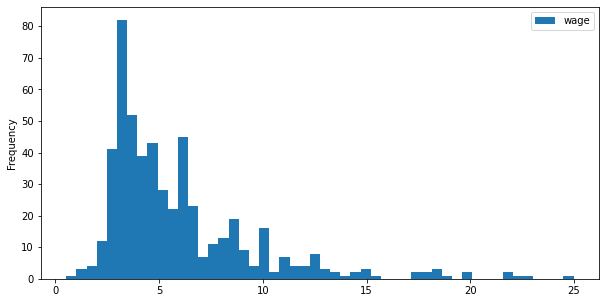

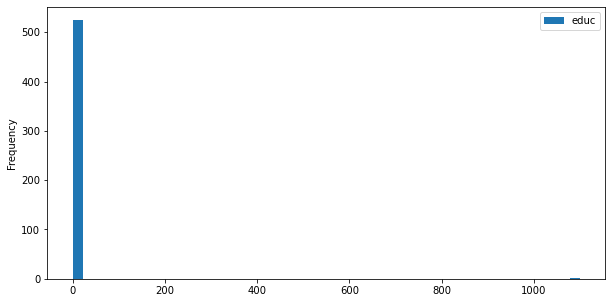

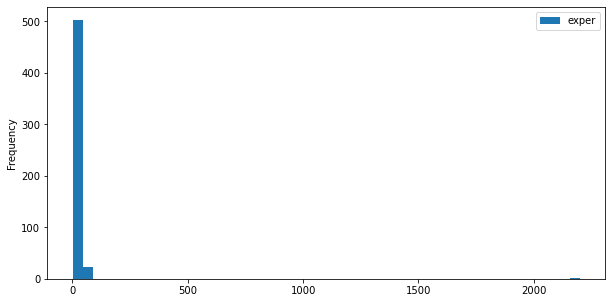

In [5]:
data0.plot(kind='hist',y='wage',bins=50)
data0.plot(kind='hist',y='educ',bins=50)
data0.plot(kind='hist',y='exper',bins=50)

In [6]:
leverage = mod.get_influence()
#dir(leverage)
analysis=pd.DataFrame([mod.resid,leverage.hat_matrix_diag,leverage.influence]).T
analysis.columns=['residual','leverage','influence']
analysis

residual  leverage   influence
0   -1.998867  0.996618 -589.068514
1   -1.385336  0.980199  -68.579282
2   -2.909999  0.001989   -0.005798
3    0.112300  0.002044    0.000230
4   -0.606334  0.001949   -0.001184
..        ...       ...         ...
521  9.100734  0.001913    0.017445
522 -3.640744  0.001996   -0.007281
523 -1.230595  0.001915   -0.002361
524  5.655478  0.001956    0.011086
525 -2.406012  0.001955   -0.004714

[526 rows x 3 columns]

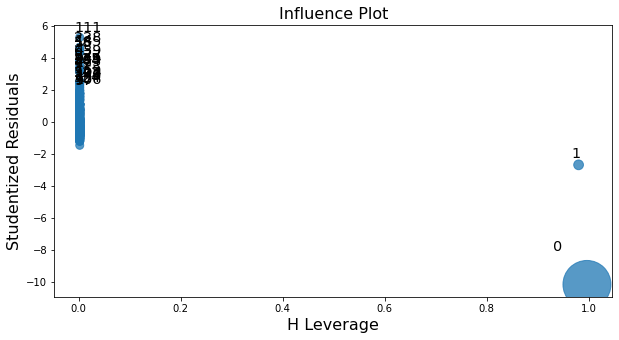

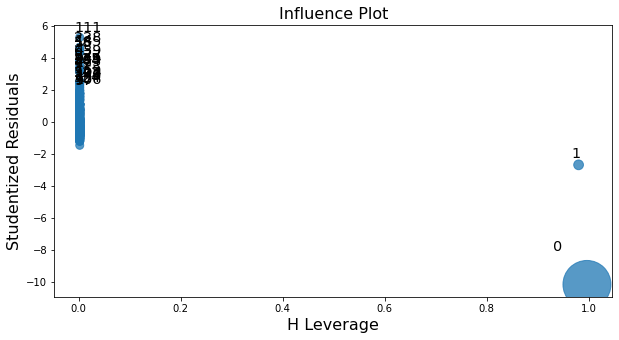

In [7]:
sms.graphics.influence_plot(mod)

In [8]:
form1='wage~educ+exper+tenure+nonwhite+female+married+numdep+smsa+northcen+south+west+construc+ndurman+trcommpu+trade+services+profserv+ profocc+clerocc+servocc+expersq+tenursq'

mod1=ols(form1,data=wage1).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     22.12
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.65e-60
Time:                        09:17:32   Log-Likelihood:                -1255.1
No. Observations:                 526   AIC:                             2556.
Df Residuals:                     503   BIC:                             2654.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8034      0.859      0.935      0.3

In [9]:
hypotheses = '(nonwhite= 0),(married = 0),(numdep= 0),(south=0),(west=0),(construc=0),(trcommpu=0),(clerocc),(servocc),(tenursq)'
f_test = mod1.f_test(hypotheses)
print(f_test)

<F test: F=array([[1.09599201]]), p=0.3631455991878491, df_denom=503, df_num=10>


In [10]:
form2='wage~educ+exper+tenure+female+smsa+northcen+ndurman+trade+services+profserv+ profocc+expersq'
mod2=ols(form2,data=wage1).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     39.56
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.69e-65
Time:                        09:17:33   Log-Likelihood:                -1260.8
No. Observations:                 526   AIC:                             2548.
Df Residuals:                     513   BIC:                             2603.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3379      0.753      0.449      0.6

In [11]:
hypotheses = '(northcen),(ndurman)'
f_test = mod2.f_test(hypotheses)
print(f_test)

<F test: F=array([[2.5874937]]), p=0.07618963190440828, df_denom=513, df_num=2>


In [12]:
form3='wage~educ+exper+tenure+female+smsa+trade+services+profserv+ profocc+expersq'
mod3=ols(form3,data=wage1).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     46.67
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.12e-66
Time:                        09:17:33   Log-Likelihood:                -1263.4
No. Observations:                 526   AIC:                             2549.
Df Residuals:                     515   BIC:                             2596.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1036      0.747      0.139      0.8

In [13]:
form4='wage~educ+exper+tenure+female+smsa+trade+services+ profocc+expersq'
mod4=ols(form4,data=wage1).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     51.60
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.20e-66
Time:                        09:17:33   Log-Likelihood:                -1264.3
No. Observations:                 526   AIC:                             2549.
Df Residuals:                     516   BIC:                             2591.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0871      0.747      0.117      0.9